In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
clas6_all = pd.read_csv('clas6/clas6_all.txt')
clas6_all.head()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,tra_rcxs,tra_rcxs_err,Fac_bnxs,Fac_rcxs,Fac_rcxs_err
0,1.49,0.1468,0.0682,0.0049,170.0,0.010338,0.003383,0.028800,1.1437,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
1,1.49,0.1468,0.0682,0.0049,190.0,0.010447,0.003276,0.029105,1.1437,0.000513,0.000133,1.507808e-07,0.000000,0.000000,0.000000e+00
2,1.49,0.1468,0.0682,0.0259,10.0,0.007477,0.000581,0.000945,1.0944,0.000466,0.000121,1.433516e-07,0.004125,0.004293,5.017118e-08
3,1.49,0.1468,0.0682,0.0259,30.0,0.007098,0.001826,0.000896,1.1008,0.000461,0.000119,1.496750e-07,0.004125,0.004293,5.017118e-08
4,1.49,0.1468,0.0682,0.0259,50.0,0.006618,0.000392,0.000835,1.1139,0.000458,0.000117,1.460023e-07,0.004125,0.004293,5.017118e-08


In [3]:
print('Q2',clas6_all['Q2'].unique())
print('x',clas6_all['x'].unique())
print('z',clas6_all['z'].unique())
print('pT2',clas6_all['pT2'].unique())

Q2 [1.49 1.74 2.02 2.37 2.93 3.42 4.1  4.85 5.72 6.61]
x [0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537
 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79   0.8469 0.9063]
z [0.0682 0.0933 0.1194 0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379
 0.3748 0.4134 0.4537 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79
 0.8469 0.9063]
pT2 [0.0049 0.0259 0.0655 0.129  0.2165 0.3402 0.5074 0.7427 1.0741 1.554 ]


In [4]:
Q2_list=clas6_all['Q2'].unique()
x_list=clas6_all['x'].unique()
z_list=clas6_all['z'].unique()
pT2_list=clas6_all['pT2'].unique()
phi_list=clas6_all['phi'].unique()
print('Q2 len ',len(Q2_list),' x len ',len(x_list),' z len ',len(z_list),' pT2 len ',len(pT2_list),' phi len ',len(phi_list))


Q2 len  10  x len  19  z len  22  pT2 len  10  phi len  18


In [5]:
i_Q2,i_x,i_z,i_pT2,i_phi = (3,7,12,4,9)


In [6]:
print('Q2:',Q2_list[i_Q2],' x:',x_list[i_x],' z:',z_list[i_z],' pT2:',pT2_list[i_pT2],' phi:',phi_list[i_phi])

Q2: 2.37  x: 0.3748  z: 0.4537  pT2: 0.2165  phi: 150.0


<ipython-input-7-5c36a58cbfdb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-7-5c36a58cbfdb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-7-5c36a58cbfdb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-7-5c36a58cbfdb>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(zs,data_xs_befo

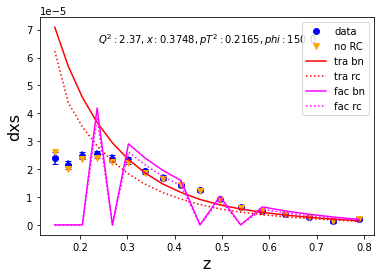

In [7]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
zs = df_z['z'].to_list()
data_xs = df_z['data_xs']
data_xs_err = df_z['data_xs_err']
data_xs_sys = df_z['data_xs_sys']
data_xs_RC = df_z['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_z['tra_bnxs']
tra_rc = df_z['tra_rcxs']
fac_bn = df_z['Fac_bnxs']
fac_rc = df_z['Fac_rcxs']
for iz in zs:
    xs = df_z[df_z['z']==iz]['data_xs'].values[0]
    xs_stat_err = df_z[df_z['z']==iz]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iz,iz],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_z[df_z['z']==iz]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(zs,data_xs,'bo',label='data')
plt.plot(zs,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(zs,0.2*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(zs,0.2*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
plt.plot(zs,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(zs,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q^2:{},x:{},pT^2:{},phi:{}$'.format(Q2_list[i_Q2],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('z',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2{}_phi{}_z.pdf'.format(i_Q2,i_x,i_pT2,i_phi))

<ipython-input-8-1c54553f4b6d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-8-1c54553f4b6d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-8-1c54553f4b6d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-8-1c54553f4b6d>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xbjs,data_xs_be

[0.2362, 0.2686, 0.3025, 0.3379, 0.3748, 0.4134, 0.4537, 0.4958, 0.5397]


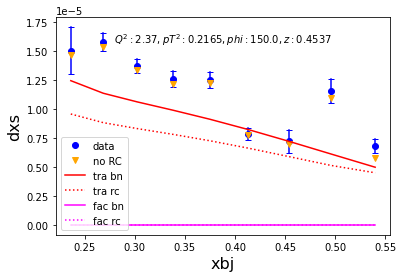

In [8]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
xbjs = df_x['x'].to_list()
print(xbjs)
data_xs = df_x['data_xs']
data_xs_err = df_x['data_xs_err']
data_xs_sys = df_x['data_xs_sys']
data_xs_RC = df_x['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_x['tra_bnxs']
tra_rc = df_x['tra_rcxs']
fac_bn = df_x['Fac_bnxs']
fac_rc = df_x['Fac_rcxs']
for ix in xbjs:
    xs = df_x[df_x['x']==ix]['data_xs'].values[0]
    xs_stat_err = df_x[df_x['x']==ix]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([ix,ix],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_x[df_x['x']==ix]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(xbjs,data_xs,'bo',label='data')
plt.plot(xbjs,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(xbjs,0.2*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(xbjs,0.2*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
plt.plot(xbjs,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(xbjs,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q^2:{},pT^2:{},phi:{},z:{}$'.format(Q2_list[i_Q2],pT2_list[i_pT2],phi_list[i_phi],z_list[i_z]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('xbj',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x_pT2{}_phi{}_z{}.pdf'.format(i_Q2,i_x,i_pT2,i_phi))

<ipython-input-9-0577060bb010>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-9-0577060bb010>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-9-0577060bb010>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-9-0577060bb010>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(Q2s,data_xs_beforeRC,

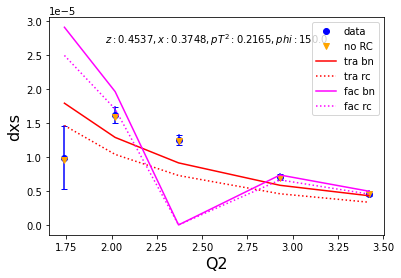

In [9]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
Q2s = df_Q2['Q2'].to_list()
data_xs = df_Q2['data_xs']
data_xs_err = df_Q2['data_xs_err']
data_xs_sys = df_Q2['data_xs_sys']
data_xs_RC = df_Q2['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_Q2['tra_bnxs']
tra_rc = df_Q2['tra_rcxs']
fac_bn = df_Q2['Fac_bnxs']
fac_rc = df_Q2['Fac_rcxs']
for iQ2 in Q2s:
    xs = df_Q2[df_Q2['Q2']==iQ2]['data_xs'].values[0]
    xs_stat_err = df_Q2[df_Q2['Q2']==iQ2]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iQ2,iQ2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_Q2[df_Q2['Q2']==iQ2]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(Q2s,data_xs,'bo',label='data')
plt.plot(Q2s,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(Q2s,0.2*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(Q2s,0.2*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
plt.plot(Q2s,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(Q2s,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$z:{},x:{},pT^2:{},phi:{}$'.format(z_list[i_z],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('Q2',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2_x{}_pT2{}_phi{}_z{}.pdf'.format(i_x,i_pT2,i_phi,i_z))

<ipython-input-10-e678da432263>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-10-e678da432263>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-10-e678da432263>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-10-e678da432263>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(pT2s,data_xs_beforeRC,'

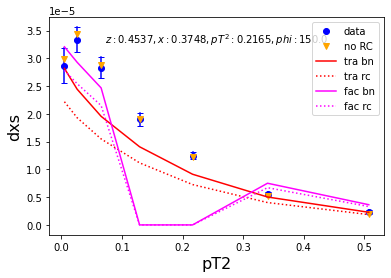

In [10]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
pT2s = df_pT2['pT2'].to_list()
data_xs = df_pT2['data_xs']
data_xs_err = df_pT2['data_xs_err']
data_xs_sys = df_pT2['data_xs_sys']
data_xs_RC = df_pT2['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_pT2['tra_bnxs']
tra_rc = df_pT2['tra_rcxs']
fac_bn = df_pT2['Fac_bnxs']
fac_rc = df_pT2['Fac_rcxs']
for ipT2 in pT2s:
    xs = df_pT2[df_pT2['pT2']==ipT2]['data_xs'].values[0]
    xs_stat_err = df_pT2[df_pT2['pT2']==ipT2]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([ipT2,ipT2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_pT2[df_pT2['pT2']==ipT2]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(pT2s,data_xs,'bo',label='data')
plt.plot(pT2s,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(pT2s,0.2*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(pT2s,0.2*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
plt.plot(pT2s,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(pT2s,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$z:{},x:{},pT^2:{},phi:{}$'.format(z_list[i_z],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('pT2',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2_phi{}_z{}.pdf'.format(i_Q2,i_x,i_phi,i_z))

<ipython-input-11-9b4157d42cf0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
<ipython-input-11-9b4157d42cf0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
<ipython-input-11-9b4157d42cf0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
<ipython-input-11-9b4157d42cf0>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(phis,data_xs_beforeRC,'

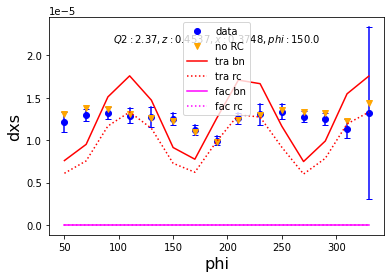

In [11]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
phis = df_phi['phi'].to_list()
data_xs = df_phi['data_xs']
data_xs_err = df_phi['data_xs_err']
data_xs_sys = df_phi['data_xs_sys']
data_xs_RC = df_phi['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_phi['tra_bnxs']
tra_rc = df_phi['tra_rcxs']
fac_bn = df_phi['Fac_bnxs']
fac_rc = df_phi['Fac_rcxs']
for iphi in phis:
    xs = df_phi[df_phi['phi']==iphi]['data_xs'].values[0]
    xs_stat_err = df_phi[df_phi['phi']==iphi]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iphi,iphi],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_phi[df_phi['phi']==iphi]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(phis,data_xs,'bo',label='data')
plt.plot(phis,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(phis,0.2*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(phis,0.2*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
plt.plot(phis,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(phis,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q2:{},z:{},x:{},phi:{}$'.format(Q2_list[i_Q2],z_list[i_z],x_list[i_x],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('phi',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2{}_phi_z{}.pdf'.format(i_Q2,i_x,i_pT2,i_z))